# Predicting Heart Disease Using Machine Learning 

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model of predicting whether or not someone has the heart disease base on their medical attributes.

Steps followed are:
1. Problem definition 
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

### 1. Problem Definition 
In a statement 

> Given a clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data
The original data is from the cleavland data from the UCI Machine Learning Repo, There is also a version available on kaggle.
[Get data here](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci)

### 3. Evaluation

> We try to reach near 90-95% accuracy at predicting whether a person has a heart disease or not for the proof of concept.

### 4. Features
This is where we get the different information about each of the features of the data.

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or
ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular 8 8 hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

## Importing the tools/libraries required

In [1]:
# Regular EDA and plotting libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import warnings 
warnings.filterwarnings(action='ignore')

## Loading the data

In [2]:
df=pd.read_csv('Downloads\heart-disease.csv')
df.shape #(rows,cols)

(303, 14)

## Data Exploration(EDA on the data)
Finding more about the data, and becoming a subject matter export on the data.

1. What questions are you trying to solve.
2. What kind of data we have and how do we treat it.
3. What's missing from the data and how we deal with it.
4. Where are the outliers and why should we care about them.
5. How can we add/change/remove features to get more out of the data.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts() # 1-yes, 0-no

1    165
0    138
Name: target, dtype: int64

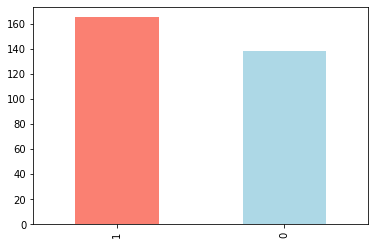

In [5]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Comparing target column with sex coloum
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


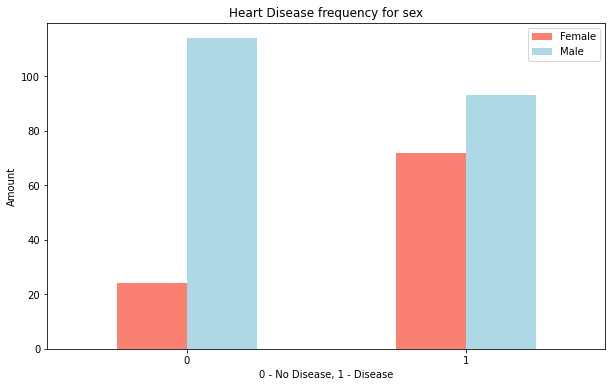

In [8]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue']);
plt.title("Heart Disease frequency for sex")
plt.xlabel('0 - No Disease, 1 - Disease')
plt.ylabel("Amount")
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

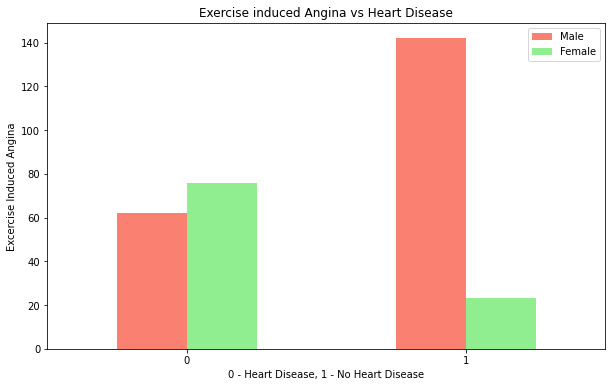

In [9]:
pd.crosstab(df.target, df.exang).plot(kind='bar',
                                     figsize=(10,6),
                                     color=['salmon','lightgreen']);
plt.title("Exercise induced Angina vs Heart Disease");
plt.xlabel('0 - Heart Disease, 1 - No Heart Disease');
plt.ylabel('Excercise Induced Angina');
plt.legend(['Male','Female']);
plt.xticks(rotation=0);

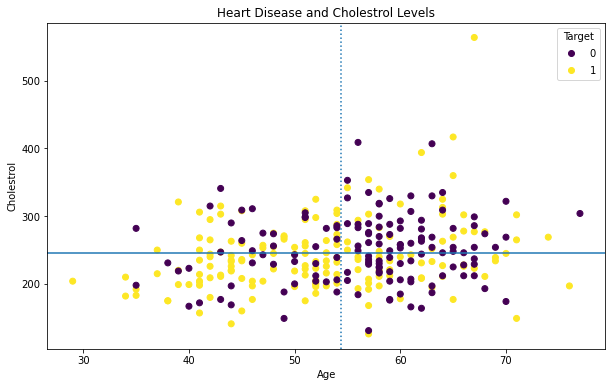

In [10]:
fig,ax=plt.subplots(figsize=(10,6))
scatter=ax.scatter(x=df['age'],
                  y=df['chol'],
                  c=df['target']);
ax.set(title='Heart Disease and Cholestrol Levels',
      xlabel='Age',ylabel='Cholestrol');
ax.legend(*scatter.legend_elements(),title='Target');
ax.axhline(df['chol'].mean(),linestyle='-');
ax.axvline(df['age'].mean(),linestyle=':');

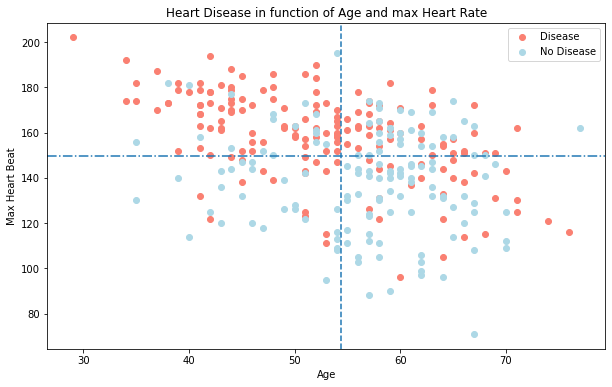

In [11]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df.age[df.target==1],
           y=df.thalach[df.target==1],
          c='salmon');
ax.scatter(df.age[df.target==0],
          y=df.thalach[df.target==0],
          c='lightblue');
ax.set(title='Heart Disease in function of Age and max Heart Rate',
      xlabel='Age',
      ylabel='Max Heart Beat');
# ax.legend(*scatter.legend_elements(),title='Target');
ax.legend(['Disease','No Disease']);
ax.axhline(df['thalach'].mean(),linestyle='dashdot');
ax.axvline(df['age'].mean(),linestyle='--');

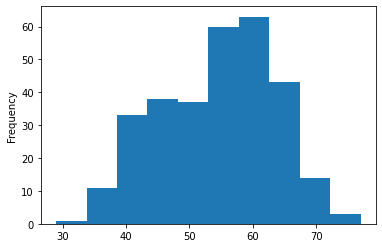

In [12]:
#Checking the distribution of the age column with a histogram to check for the outliers
df.age.plot(kind='hist');

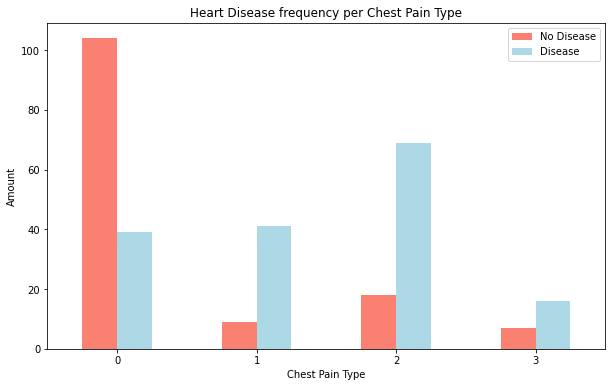

In [13]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','lightblue']);
plt.title('Heart Disease frequency per Chest Pain Type');
plt.ylabel("Amount");
plt.xlabel("Chest Pain Type");
plt.xticks(rotation=0);
plt.legend(['No Disease','Disease']);

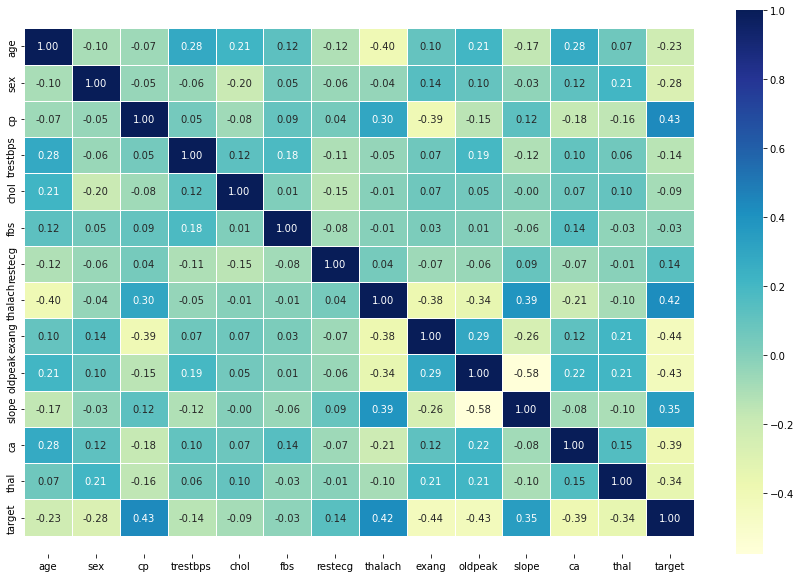

In [14]:
# Create a correlation matrix and visualize

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap='YlGnBu')
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

In [15]:
# Creating train_test split and preparing the data
np.random.seed(42)
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Now the data is split into train and test data set now we train it to find the patterns using the train data and check the patterns in the test data.

Models we will be using for classification.
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [16]:
# Putting models into a dictionary
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

#Create a function to fit and score the model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
        Fits and evaluates the machine learning model.
        models: A dict of different sklearn machine learning models.
        X_train: Train Data (no labels)
        y_train: Train Data (labels)
        X_test: Test Data (no labels)
        y_test: Test Data (labels)
     """
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [17]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)

In [18]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

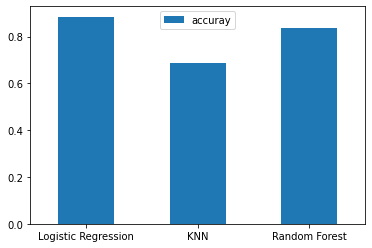

In [19]:
model_compare=pd.DataFrame(model_scores, index=['accuray'])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

Now we've got our baseline model and the first prediction should not be taken into considerations.
We will try the following things:
1. Hyperparameter tuning
2. Feature importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification Report 
9. ROC Curve
10. Area Under Curve (AUC)

## Hyper Parameter Tuning 

In [20]:
train_scores,test_scores=[],[]

#Create a list of different values for n_neighbors (default = 5)
neighbors=range(1,21)
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [21]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


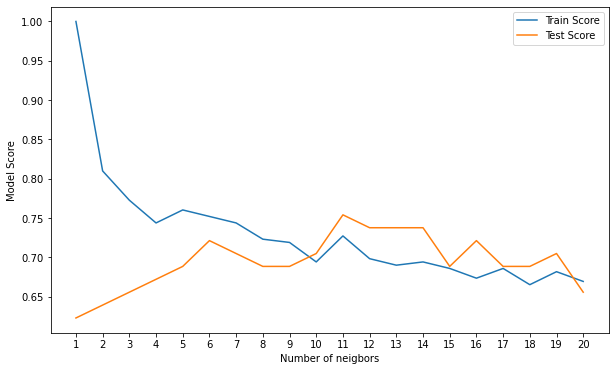

In [22]:
fig,ax=plt.subplots(figsize=(10,6))
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neigbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyper-parameter tuning using RandomizedSearchCV

We are going to tune 
* LogisticRegression()
* RandomForestClassifier()

In [23]:
# Create a hyper parameter grid for LogisticRegression 
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

#Create Hyper parameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [24]:
# Tune LogisticRegression()
np.random.seed(42)

#setup random hyper parameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fit random hyper parameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned the LogisticRegression we will do the same for random forestClassfier

In [27]:
#Set up random seed
np.random.seed(42)

#Setup random hyper paramters search for RandomizedSearchCV
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
#Find the best hyper parameter 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Tuning hyper parameters of LogisticRegression Model using GridSearchCV

Since our LogisticRegression model provides best result, we try to improve it further using GridSearchCV.

In [30]:
## Tuning the hyper parameters of LogisticRegression using GridSearchCV
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":['liblinear']}

#Setup hyper parameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

#Fitting the grid on model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
#Checking the best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
#Evaluation on the test data
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating the models beyond accuracy

* ROC Curve and AUC Score
* Confusion Matrix 
* Classification Report
* Precision
* Recall
* F1-Score

To make comparisons and evaluate, first we need to make predictions.

In [33]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

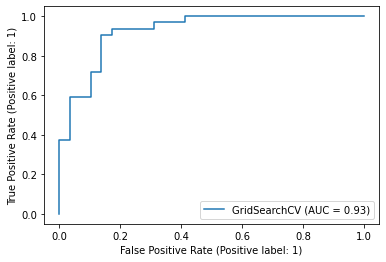

In [34]:
# Plot ROC curve and calculate AUC metric 

plot_roc_curve(gs_log_reg, X_test, y_test);

In [35]:
# Confusion Matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


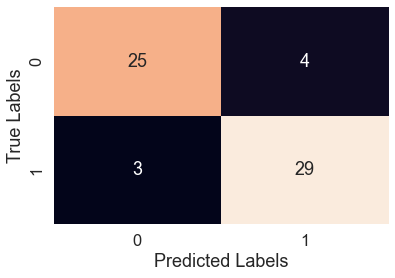

In [36]:
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test, y_preds):
    """
        Plots a Confusion Matrix using seaborn's heatmap.
    """
    fig,ax=plt.subplots(figsize=(6,4))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
plot_conf_matrix(y_test, y_preds)

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We are going to calculate 
* Precision
* Recall
* F1-score 
using cross-validation and to do this we use `cross_val_score()`

In [38]:
# Check hyper-parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')

In [41]:
#Cross validated accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [43]:
#Cross validated precision 
cv_precision=cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [44]:
#Cross validated recall
cv_recall=cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [45]:
#Cross validated f1-score
cv_f1_score=cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='f1')
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

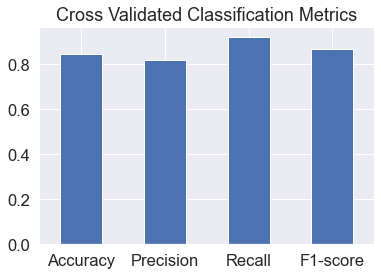

In [46]:
#Visualizing the cross validated matrix 
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1-score":cv_f1_score},index=[0])
cv_metrics.T.plot.bar(title='Cross Validated Classification Metrics',
                     legend=False);
plt.xticks(rotation=0);

### Feature Importance 

Feature importance is a way of asking, "Which features contributed most to the outcome of the model and how did the contribute?"

In [47]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')
clf.fit(X_train,y_train);

In [51]:
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [54]:
features_dict=dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

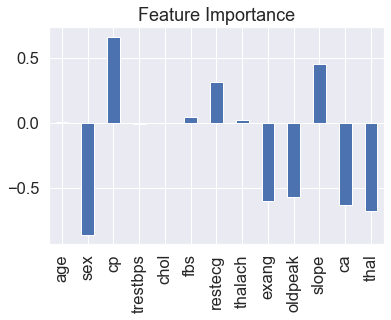

In [57]:
features_df=pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance',
                  legend=False);